# Question 1

Number of Missing values: 

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

 Missing values after replacement: 

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostil

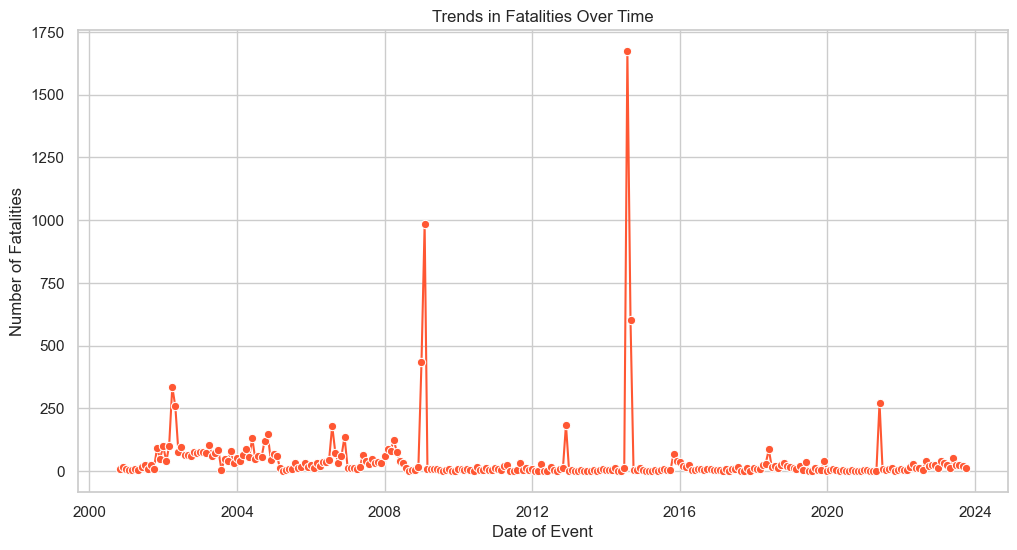

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fatalities.csv')

df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

print("Number of Missing values: \n")
print(df.isnull().sum())

df = df.apply(lambda x: x.fillna(x.mode().iloc[0]))

print("\n Missing values after replacement: \n")
print(df.isnull().sum())

df.set_index('date_of_event', inplace=True)

monthly_fatalities = df.resample('M').size().reset_index(name='fatalities_count')

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 6))
sns.lineplot(x='date_of_event', y='fatalities_count', data=monthly_fatalities, marker='o', linestyle='-', color='#FF5733')
plt.title('Trends in Fatalities Over Time')
plt.xlabel('Date of Event')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()


# Question 2

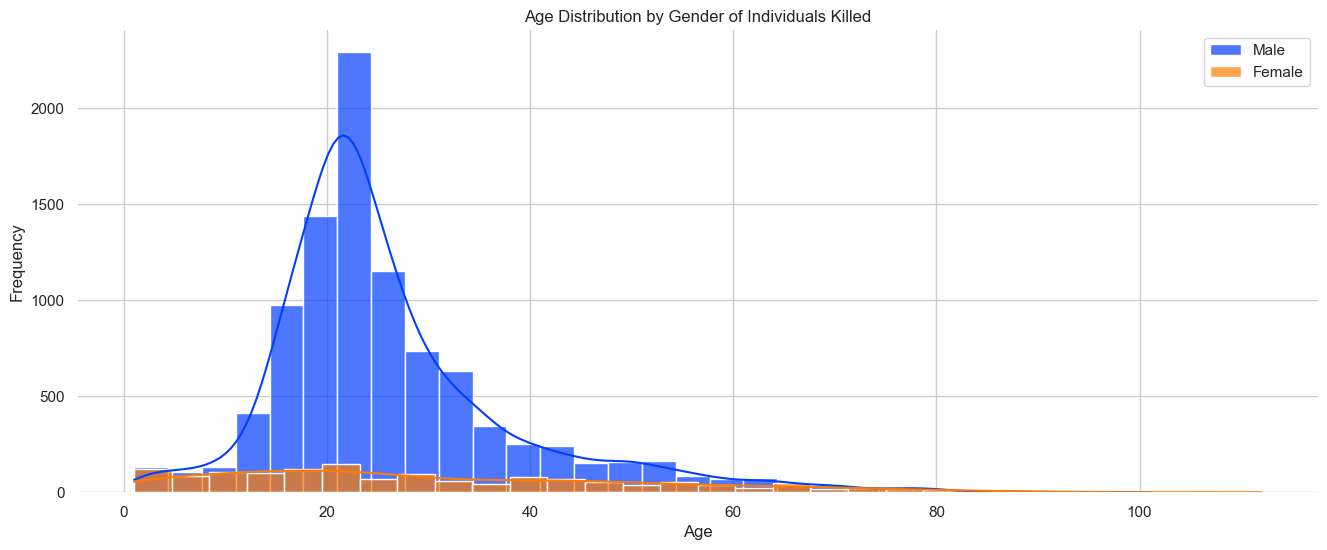

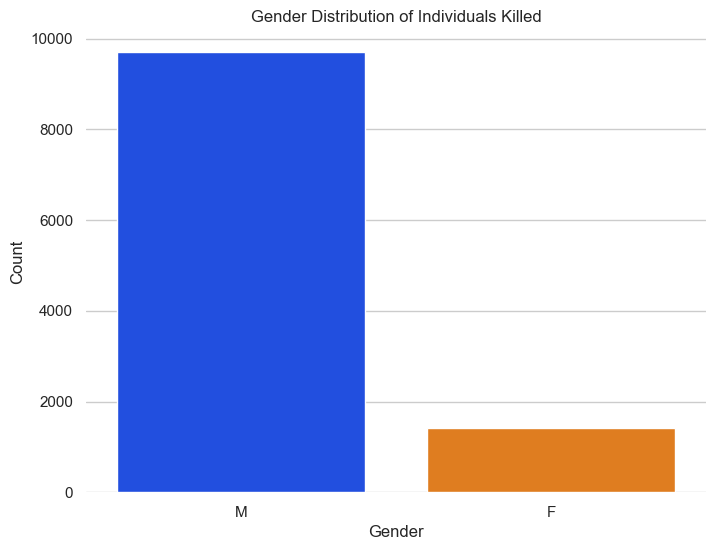

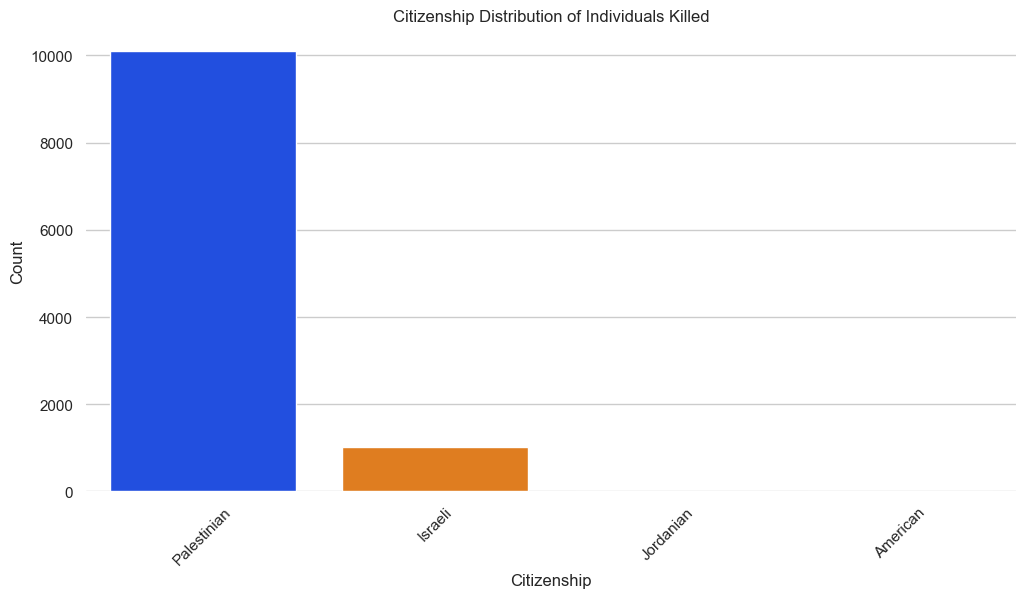

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fatalities.csv')

df = df.apply(lambda x: x.fillna(x.mode().iloc[0]))

df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

sns.set_palette("bright")

plt.figure(figsize=(16, 6))

sns.histplot(df[df['gender'] == 'M']['age'], bins=30, kde=True, label='Male', alpha=0.7)
sns.histplot(df[df['gender'] == 'F']['age'], bins=30, kde=True, label='Female', alpha=0.7)
plt.title('Age Distribution by Gender of Individuals Killed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
sns.despine(left=True, bottom=True)

plt.figure(figsize=(8, 6))

sns.countplot(x='gender', data=df)
plt.title('Gender Distribution of Individuals Killed')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.despine(left=True, bottom=True)

plt.figure(figsize=(12, 6))

sns.countplot(x='citizenship', data=df, order=df['citizenship'].value_counts().index)
plt.title('Citizenship Distribution of Individuals Killed')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)

plt.show()


# Question 3

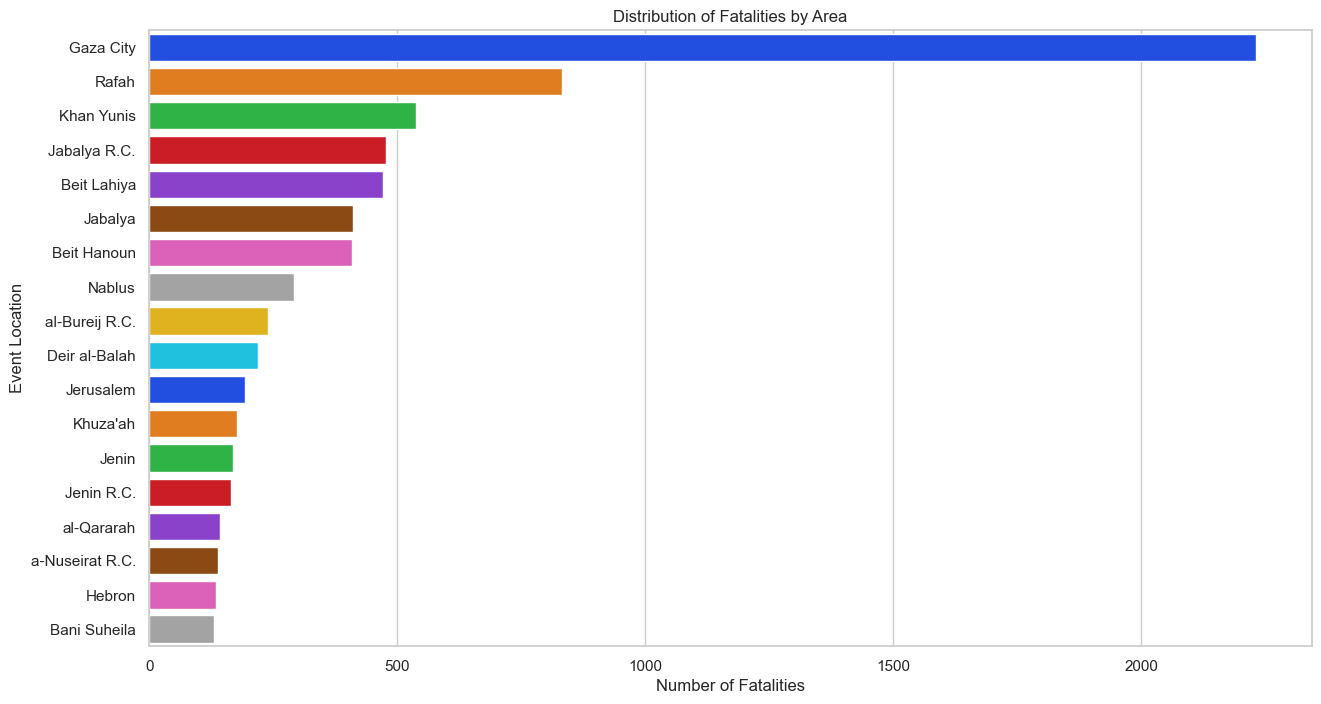

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fatalities.csv')

df = df.apply(lambda x: x.fillna(x.mode().iloc[0]))

df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

sns.set_palette("bright")

top_areas = df['event_location'].value_counts().head(18)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_areas.values, y=top_areas.index, palette="bright")
plt.title('Distribution of Fatalities by Area')
plt.xlabel('Number of Fatalities')
plt.ylabel('Event Location')
plt.show()


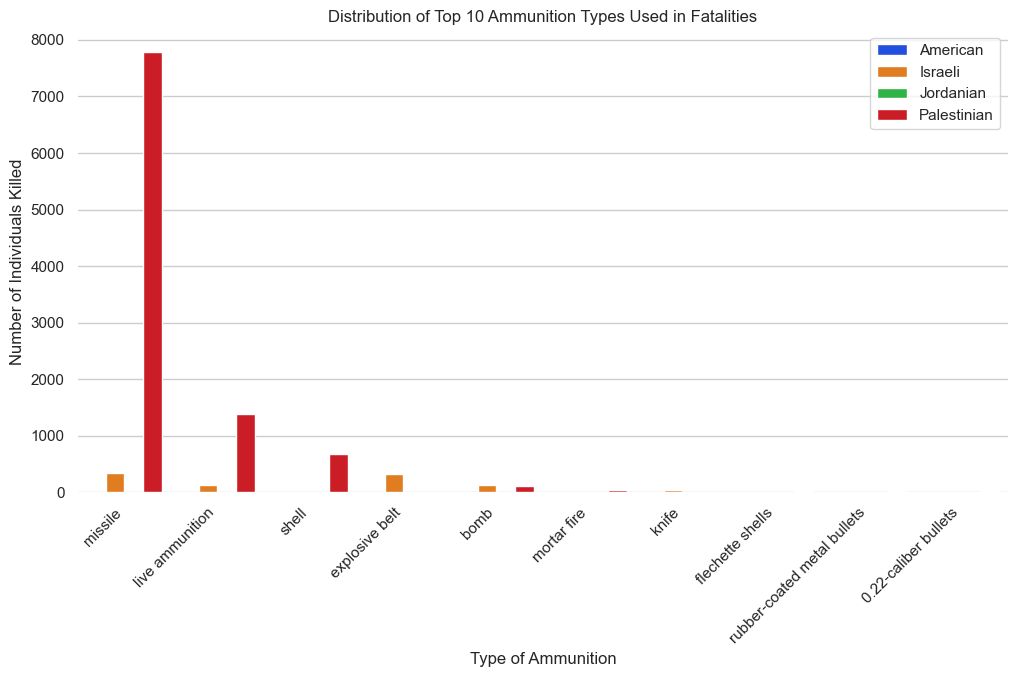

In [20]:

sns.set_palette("bright")

grouped_data = df.groupby(['citizenship', 'ammunition']).size().reset_index(name='count')


top_10_ammunition = df['ammunition'].value_counts().index[:10]
filtered_data = grouped_data[grouped_data['ammunition'].isin(top_10_ammunition)]


plt.figure(figsize=(12, 6))
sns.barplot(x='ammunition', y='count', hue='citizenship', data=filtered_data, palette="bright", order=top_10_ammunition)


plt.title('Distribution of Top 10 Ammunition Types Used in Fatalities')
plt.xlabel('Type of Ammunition')
plt.ylabel('Number of Individuals Killed')

plt.xticks(rotation=45, ha='right')

plt.legend(loc='lower right')

sns.despine(left=True, bottom=True)
plt.legend(loc='upper right')
# Show the plot
plt.show()


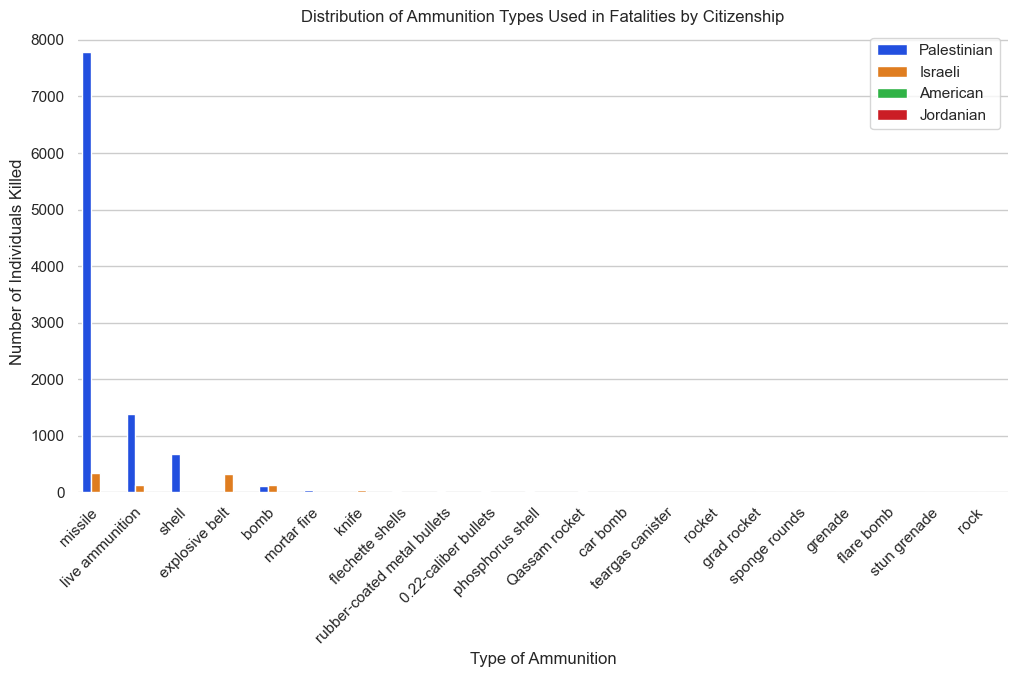

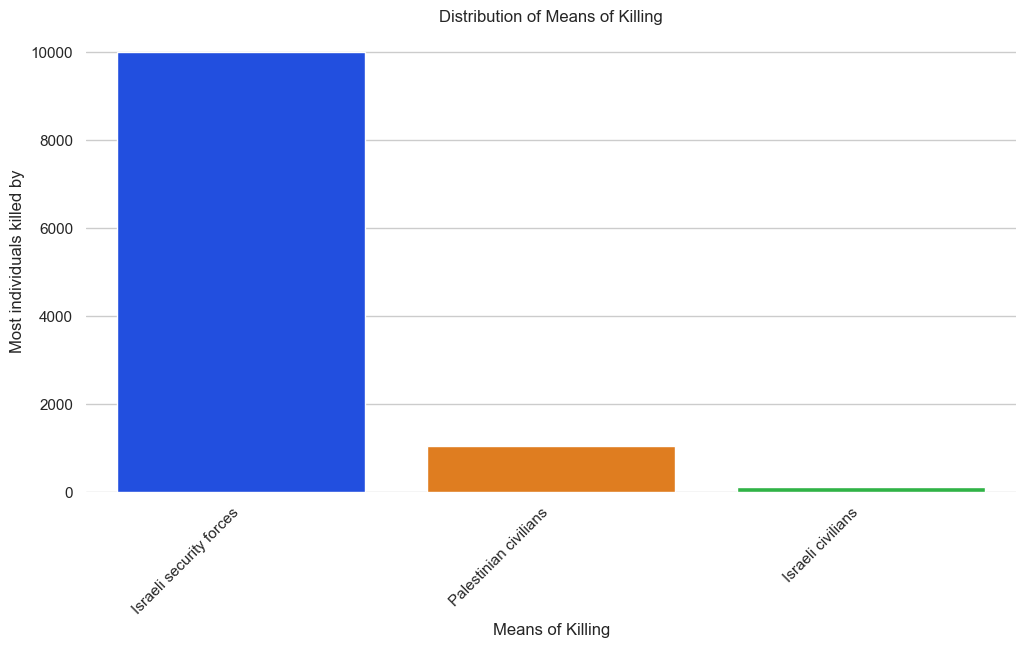

In [23]:

sns.set_palette("bright")

plt.figure(figsize=(12, 6))
sns.barplot(x='ammunition', y='ammunition_count', hue='citizenship', data=df.groupby(['ammunition', 'citizenship']).size().reset_index(name='ammunition_count'), palette="bright", order=df['ammunition'].value_counts().index)


plt.title('Distribution of Ammunition Types Used in Fatalities by Citizenship')
plt.xlabel('Type of Ammunition')
plt.ylabel('Number of Individuals Killed')


plt.xticks(rotation=45, ha='right')


sns.despine(left=True, bottom=True)

plt.legend(loc='upper right')

plt.show()



plt.figure(figsize=(12, 6))
sns.barplot(x=df['killed_by'].value_counts().index, y=df['killed_by'].value_counts(), palette="bright", order=df['killed_by'].value_counts().index)


plt.title('Distribution of Means of Killing')
plt.xlabel('Means of Killing')
plt.ylabel('Most individuals killed by')


plt.xticks(rotation=45, ha='right')


sns.despine(left=True, bottom=True)


plt.show()

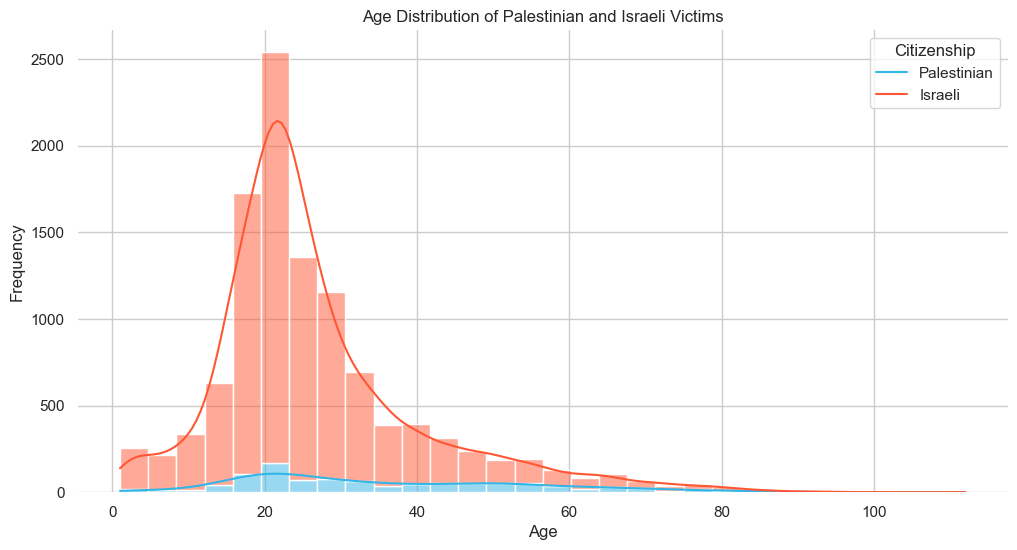

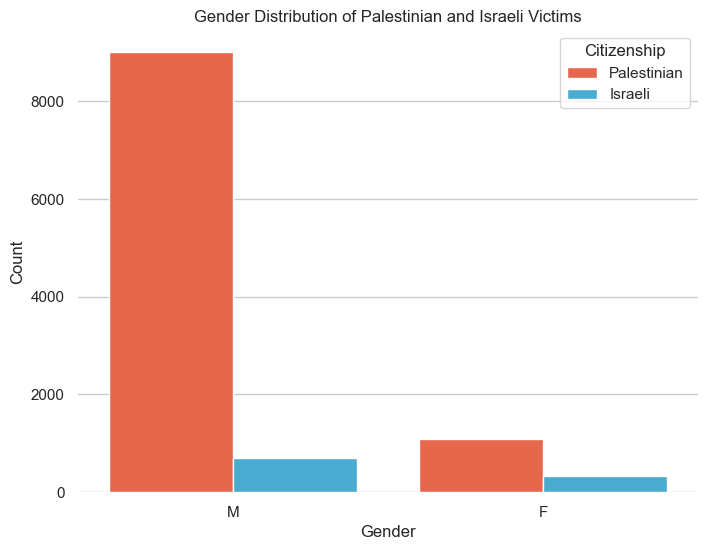

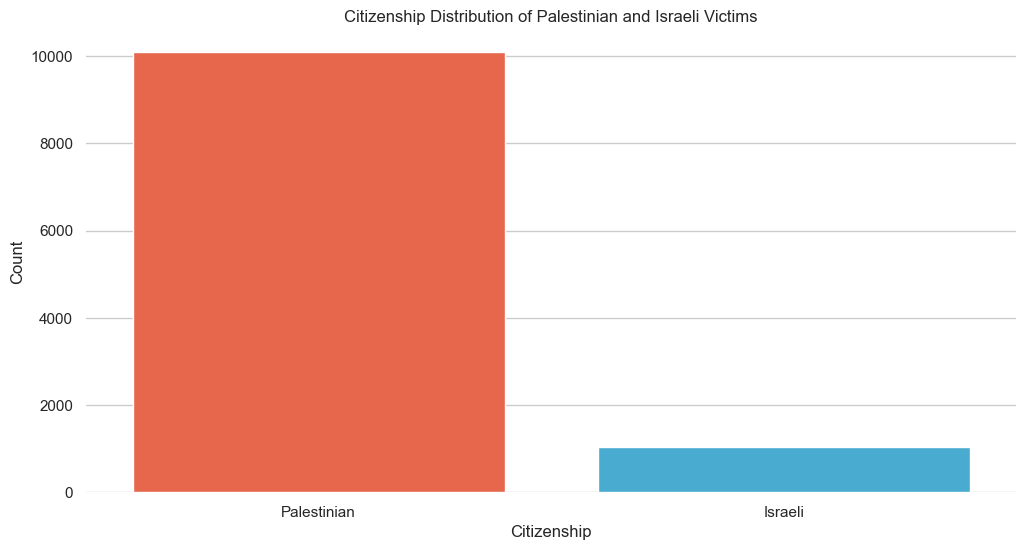

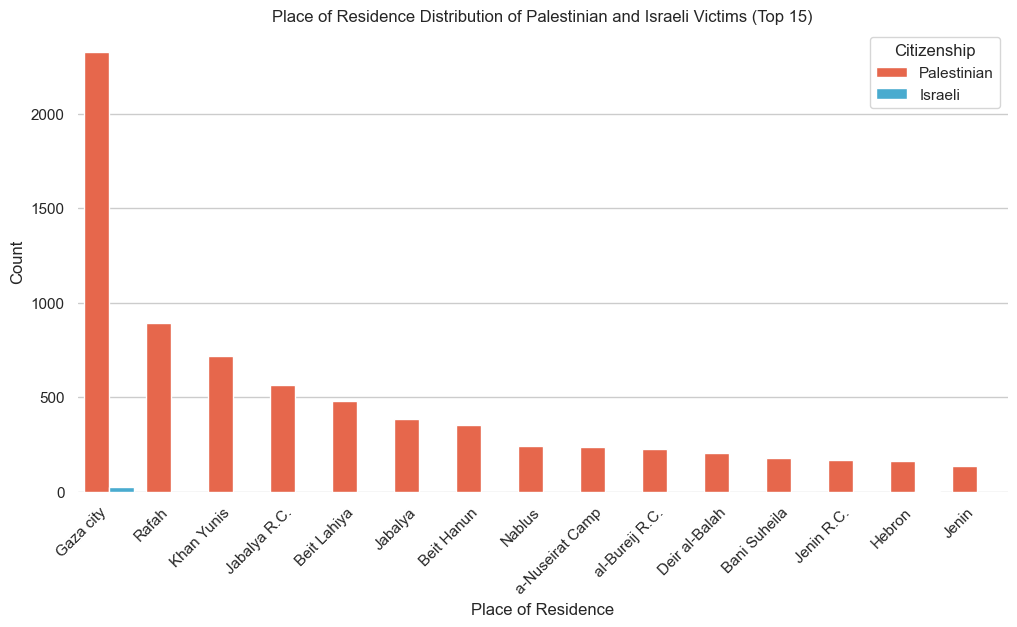

In [25]:

filtered_df = df[df['citizenship'].isin(['Palestinian', 'Israeli'])]


sns.set_palette("bright")

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='age', bins=30, kde=True, hue='citizenship', multiple='stack', palette=['#FF5733', '#33B5E5'])
plt.title('Age Distribution of Palestinian and Israeli Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Citizenship', labels=['Palestinian', 'Israeli'])
sns.despine(left=True, bottom=True)
plt.show()

# Create a count plot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=filtered_df, hue='citizenship', palette=['#FF5733', '#33B5E5'])
plt.title('Gender Distribution of Palestinian and Israeli Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Citizenship', labels=['Palestinian', 'Israeli'])
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='citizenship', data=filtered_df, palette=['#FF5733', '#33B5E5'], order=['Palestinian', 'Israeli'])
plt.title('Citizenship Distribution of Palestinian and Israeli Victims')
plt.xlabel('Citizenship')
plt.ylabel('Count')
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='place_of_residence', data=filtered_df, hue='citizenship', palette=['#FF5733', '#33B5E5'], order=filtered_df['place_of_residence'].value_counts().index[:15])
plt.title('Place of Residence Distribution of Palestinian and Israeli Victims (Top 15)')
plt.xlabel('Place of Residence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Citizenship', labels=['Palestinian', 'Israeli'])
sns.despine(left=True, bottom=True)
plt.show()